In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
train = pd.read_csv("/content/drive/MyDrive/colabData/deeptweets/train.csv")

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6525 entries, 0 to 6524
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   TweetId    6525 non-null   int64 
 1   Label      6525 non-null   object
 2   TweetText  6525 non-null   object
dtypes: int64(1), object(2)
memory usage: 153.1+ KB


In [ ]:
train.head()

,TweetId,Label,TweetText
0,304271250237304833,Politics,'#SecKerry: The value of the @StateDept and @U...
1,304834304222064640,Politics,'@rraina1481 I fear so'
2,303568995880144898,Sports,'Watch video highlights of the #wwc13 final be...
3,304366580664528896,Sports,'RT @chelscanlan: At Nitro Circus at #AlbertPa...
4,296770931098009601,Sports,'@cricketfox Always a good thing. Thanks for t...


In [ ]:
train.isnull().sum()

TweetId      0
Label        0
TweetText    0
dtype: int64

In [ ]:
train.TweetText = train['TweetText'].str.replace("[^a-zA-Z#]", " ")


In [ ]:
occ = {}
occ.clear()
#simple sanitizing for prototype only
for i in train["TweetText"]:
  for j in i.split():
    if j in occ.keys():
      occ[j] = occ[j]+1
    else:
      occ[j] =  1
#sort dectionnary 
occ = dict(sorted(occ.items(), key=lambda item: item[1], reverse=True))
#manually first 34 word in the dictionary are useless
lis = list(occ.keys())[34:]
lis = [i for i in lis if len(i) > 1]
commonWords = lis[:5000]
len(commonWords)#take just 5000 feature max

5000

In [ ]:
X = pd.DataFrame(columns= commonWords)
for i in range(len(train)):
  l = []
  tempText = train.TweetText[i].split()
  for j in commonWords:      
    if j in tempText:
      l.append(1)
    else:
      l.append(0)
  X.loc[i] = l
  if(i%250 == 0):
    print(i)


0
250
500
750
1000
1250
1500
1750
2000
2250
2500
2750
3000
3250
3500
3750
4000
4250
4500
4750
5000
5250
5500
5750
6000
6250
6500


In [ ]:
y = train.Label.apply(lambda val:  1 if val == "Sports" else 0)
X

,President,are,Test,Obama,We,as,all,st,PM,#IndvAus,more,can,up,India,not,your,off,BCCI,was,now,fVNl,KTPB,runs,#BBL,an,first,over,about,time,here,#bigfinals,#atp,#CFC,after,th,but,today,new,been,win,...,Balasaheb,Sushma,Stowford,Wales,Word,Pinch,Myself,#Education,Mother,song,Mid,SachinKalbag,SAPOpenTennis,turnaround,HumanRightsgov,episode,blown,dsadan,Either,write,wheelchair,ESPNMondayNight,Geno,Gruden,Fist,rolled,tkts,Hunger,webcast,extraordinary,hi,aplenty,Eden,dimensions,Cuttsy,slash,spun,SoccerAM,revealing,davos
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6520,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6521,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6522,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6523,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#split train and dev datasets
from sklearn.model_selection import train_test_split
#NB: split function make shuffling by default
#NB random state is seed for random. to generate same random values every time
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [ ]:
X_train


,President,are,Test,Obama,We,as,all,st,PM,#IndvAus,more,can,up,India,not,your,off,BCCI,was,now,fVNl,KTPB,runs,#BBL,an,first,over,about,time,here,#bigfinals,#atp,#CFC,after,th,but,today,new,been,win,...,Balasaheb,Sushma,Stowford,Wales,Word,Pinch,Myself,#Education,Mother,song,Mid,SachinKalbag,SAPOpenTennis,turnaround,HumanRightsgov,episode,blown,dsadan,Either,write,wheelchair,ESPNMondayNight,Geno,Gruden,Fist,rolled,tkts,Hunger,webcast,extraordinary,hi,aplenty,Eden,dimensions,Cuttsy,slash,spun,SoccerAM,revealing,davos
4418,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6322,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2986,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2841,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
117,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4931,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3264,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1653,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2607,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

plot_train_acc = []
plot_test_acc = []
max_test_acc = 0
max_acc_nb_features = 0;

for n_features in range(500, 5001, 200):
  print("number of features ---" + str(n_features))
  X_train_limited_features = X_train.iloc[:, : n_features]
  X_test_limited_features  = X_test.iloc[:, : n_features]

  for iter in range(100, 1500, 500):
    print("iterations ---:"+ str(iter))
    lr = LogisticRegression(max_iter=iter)
    lr.fit(X_train_limited_features, y_train)
    train_acc = accuracy_score(y_train, lr.predict(X_train_limited_features))
    test_acc = accuracy_score(y_test, lr.predict(X_test_limited_features))
    if test_acc > max_test_acc:
      max_acc_nb_features = n_features
    plot_train_acc.append( train_acc )
    plot_test_acc.append( test_acc )
    print(f"Training Accuracy of Logistic Regression is {train_acc}")
    print(f"Test Accuracy of Logistic Regression is {test_acc}")
  print("----------------------------------------------\n")



number of features ---500
iterations ---:100
Training Accuracy of Logistic Regression is 0.90825487190716
Test Accuracy of Logistic Regression is 0.8748723186925434
iterations ---:600
Training Accuracy of Logistic Regression is 0.90825487190716
Test Accuracy of Logistic Regression is 0.8748723186925434
iterations ---:1100
Training Accuracy of Logistic Regression is 0.90825487190716
Test Accuracy of Logistic Regression is 0.8748723186925434
----------------------------------------------

number of features ---700
iterations ---:100
Training Accuracy of Logistic Regression is 0.9347492883731114
Test Accuracy of Logistic Regression is 0.9009193054136875
iterations ---:600
Training Accuracy of Logistic Regression is 0.9347492883731114
Test Accuracy of Logistic Regression is 0.9009193054136875
iterations ---:1100
Training Accuracy of Logistic Regression is 0.9347492883731114
Test Accuracy of Logistic Regression is 0.9009193054136875
----------------------------------------------

number of 

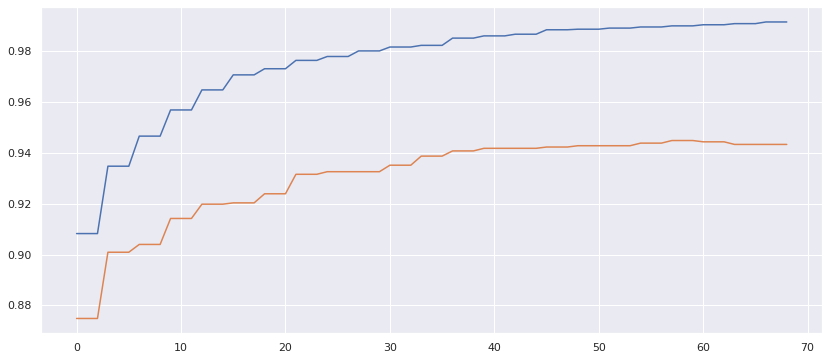

In [ ]:
plt.plot(plot_train_acc, label="train")
plt.plot(plot_test_acc, label = "test")

In [ ]:
#hyper params: number of features & number of iterations
#best values: nb_features = 4900; nb_iterations (dosnt really matter) = 1000 ;
max_acc_nb_features

4900

In [ ]:
X_train_limited_features = X_train.iloc[:, : max_acc_nb_features]
X_test_limited_features  = X_test.iloc[:, : max_acc_nb_features]

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_limited_features, y_train)
train_acc = accuracy_score(y_train, lr.predict(X_train_limited_features))
test_acc = accuracy_score(y_test, lr.predict(X_test_limited_features))


lr_acc = accuracy_score(y_test, lr.predict(X_test_limited_features))

print(f"Training Accuracy of Logistic Regression is {accuracy_score(y_train, lr.predict(X_train_limited_features))}")
print(f"Test Accuracy of Logistic Regression is {lr_acc}")

print(confusion_matrix(y_test, lr.predict(X_test_limited_features)))
print(classification_report(y_test, lr.predict(X_test_limited_features)))

Training Accuracy of Logistic Regression is 0.9914604773374206
Test Accuracy of Logistic Regression is 0.9433094994892748
[[853  67]
 [ 44 994]]
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       920
           1       0.94      0.96      0.95      1038

    accuracy                           0.94      1958
   macro avg       0.94      0.94      0.94      1958
weighted avg       0.94      0.94      0.94      1958



In [ ]:
test = pd.read_csv("/content/drive/MyDrive/colabData/deeptweets/test.csv")
test.TweetText = test['TweetText'].str.replace("[^a-zA-Z#]", " ")
X_submission = pd.DataFrame(columns=commonWords)
for i in range(len(test)):
  if(i%500 == 0):
    print(i)
  l = []
  tempText = test.TweetText[i].split()
  for j in commonWords:      
    if j in tempText:
      l.append(1)
    else:
      l.append(0)
  X_submission.loc[i] = l
len(test)

0
500
1000
1500
2000
2500


2610

In [350]:
X_submission = X_submission.iloc[:, : max_acc_nb_features]

predicted = lr.predict(X_submission)


labeler = lambda val: "Sports" if val == 1 else "Politics"

labels = np.array([labeler(xi) for xi in predicted])



In [351]:
my_submission = pd.DataFrame({'TweetId': test.TweetId , 'Label': labels})
# you could use any filename. We choose submission here
my_submission.to_csv('submission.csv', index=False)